# Analise exploratoria dos dados disponibilizados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Gastos_Publicidade_MelhoresCompras.csv')
df.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000,1000
1,2022,1,Redes sociais,120000,800
2,2022,1,TV,250000,1500
3,2022,1,Jornal,110000,730
4,2022,1,Revista,40000,360


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Ano                                                      200 non-null    int64 
 1   Mes                                                      200 non-null    int64 
 2   Tipo de Midia                                            200 non-null    object
 3   Gastos com Publicidade (em R$)                           200 non-null    object
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [4]:
df['Gastos com Publicidade (em R$)'] = df['Gastos com Publicidade (em R$)'].str.replace(",", ".").astype(float)

In [5]:
df.describe()

,Ano,Mes,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
count,200.000000,200.000000,200.000000,200.000000
mean,2022.920000,5.810000,156151.314000,1655.360000
std,0.797987,3.327048,75946.108386,1106.972207
min,2022.000000,1.000000,11000.000000,200.000000
25%,2022.000000,3.000000,100800.000000,822.000000
50%,2023.000000,5.500000,139550.000000,1400.000000
75%,2024.000000,8.250000,203700.000000,2132.000000
max,2024.000000,12.000000,335664.000000,5310.000000


In [6]:
df.describe(include = 'object')

,Tipo de Midia
count,200
unique,8
top,Paginas web
freq,31


<Axes: xlabel='Previsao Inicial de Aumento de Vendas (em mil unidades)'>

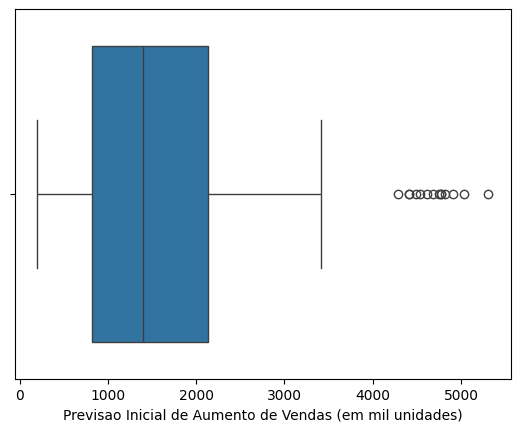

In [7]:
sns.boxplot(x = df['Previsao Inicial de Aumento de Vendas (em mil unidades)'])

<Axes: xlabel='Gastos com Publicidade (em R$)'>

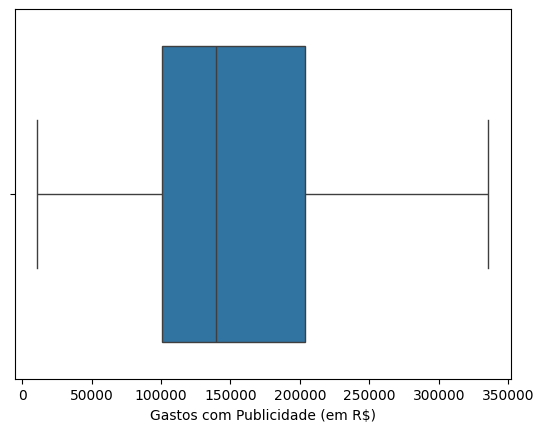

In [8]:
sns.boxplot(x = df['Gastos com Publicidade (em R$)'])

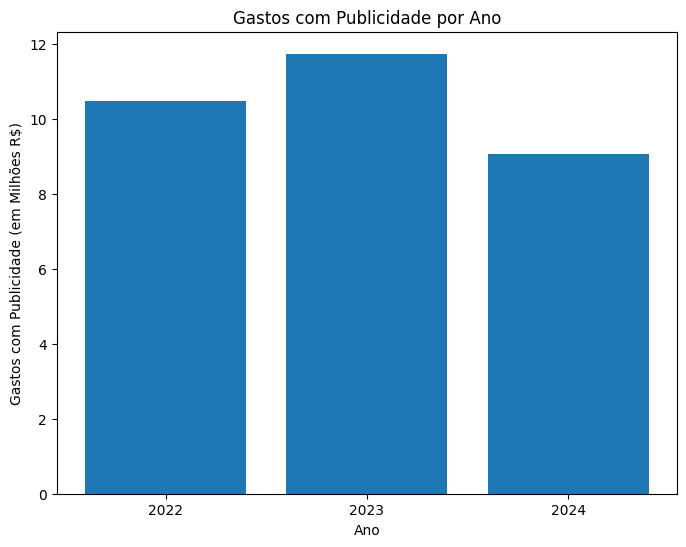

In [9]:
gastos = df.groupby('Ano').sum()['Gastos com Publicidade (em R$)']
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(gastos.index, (gastos.values / 1000000))  
ax.set_xticks(gastos.index)
ax.set_xlabel('Ano')
ax.set_ylabel('Gastos com Publicidade (em Milhões R$)')
ax.set_title('Gastos com Publicidade por Ano')

plt.show() 

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814., 19905.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07')])

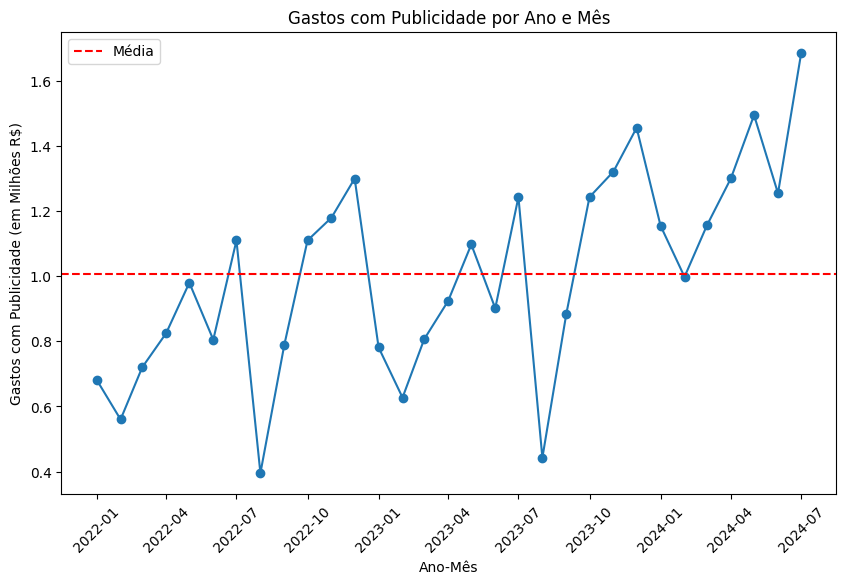

In [10]:
gastos_mensais = df.groupby(['Ano', 'Mes']).sum(numeric_only=True)['Gastos com Publicidade (em R$)']

gastos_mensais = gastos_mensais.reset_index()
gastos_mensais['Data'] = pd.to_datetime(gastos_mensais['Ano'].astype(str) + '-' + gastos_mensais['Mes'].astype(str) + '-01') # Define o primeiro dia do mês como padrão
gastos_mensais.set_index('Data', inplace=True)


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(gastos_mensais.index, (gastos_mensais['Gastos com Publicidade (em R$)'] / 1000000), marker='o')

ax.axhline(y = gastos_mensais['Gastos com Publicidade (em R$)'].mean() / 1000000, color='red', linestyle='--', label= 'Média')

# Formatando o eixo x para mostrar ano e mês
ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Gastos com Publicidade (em Milhões R$)')
ax.set_title('Gastos com Publicidade por Ano e Mês')
plt.legend()

plt.xticks(rotation=45)

Text(0.5, 1.0, 'Gastos com Publicidade por Tipo de Midia')

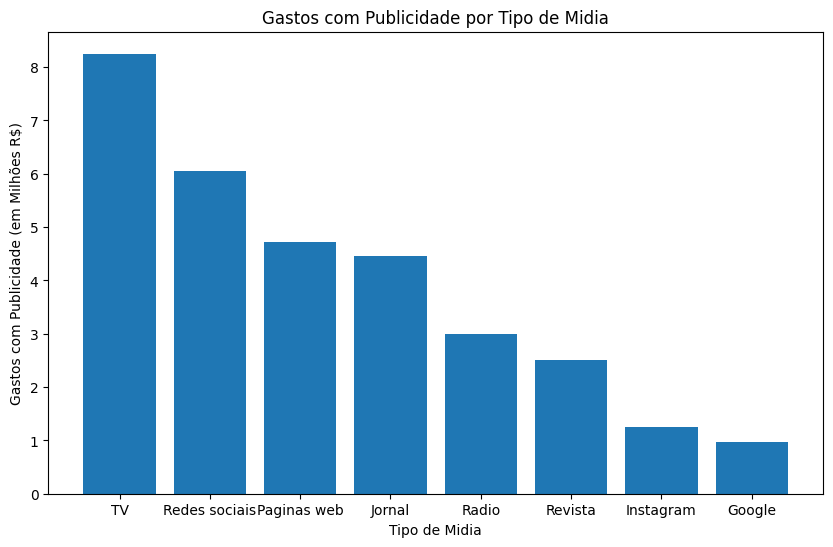

In [11]:
gasto_por_midia = df.groupby('Tipo de Midia').sum()['Gastos com Publicidade (em R$)']

gasto_por_midia = gasto_por_midia.sort_values(ascending= False)
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(gasto_por_midia.index, (gasto_por_midia.values / 1000000))

# Formatando o eixo x para mostrar ano e mês
ax.set_xlabel('Tipo de Midia')
ax.set_ylabel('Gastos com Publicidade (em Milhões R$)')
ax.set_title('Gastos com Publicidade por Tipo de Midia')


Text(0.5, 1.0, 'Previsao de vendas por Tipo de Midia')

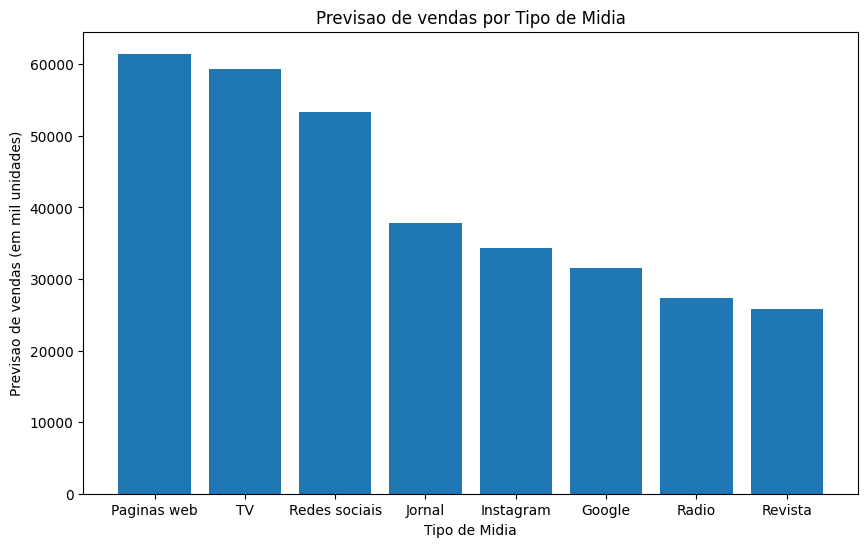

In [12]:
previsao_vendas = df.groupby('Tipo de Midia').sum()['Previsao Inicial de Aumento de Vendas (em mil unidades)'].sort_values(ascending= False)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(previsao_vendas.index, (previsao_vendas.values))

# Formatando o eixo x para mostrar ano e mês
ax.set_xlabel('Tipo de Midia')
ax.set_ylabel('Previsao de vendas (em mil unidades)')
ax.set_title('Previsao de vendas por Tipo de Midia')

C:\Users\lucas\AppData\Local\Temp\ipykernel_18836\937192368.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


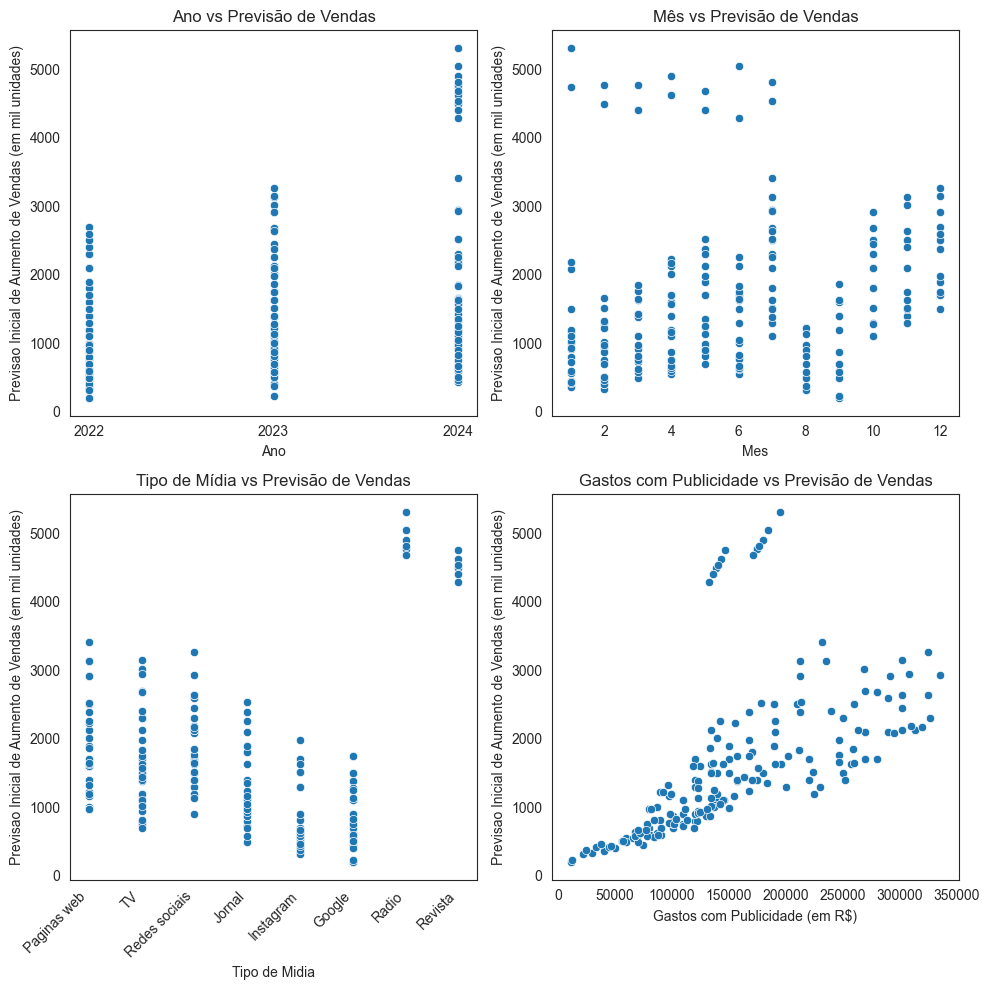

In [15]:
sns.set_style("white")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(x='Ano', y="Previsao Inicial de Aumento de Vendas (em mil unidades)", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Ano vs Previsão de Vendas")
axs[0, 0].set_xticks(df['Ano'].unique()) 

sns.scatterplot(x='Mes', y="Previsao Inicial de Aumento de Vendas (em mil unidades)", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Mês vs Previsão de Vendas")

sns.scatterplot(x='Tipo de Midia', y="Previsao Inicial de Aumento de Vendas (em mil unidades)", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Tipo de Mídia vs Previsão de Vendas")
axs[1, 0].set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

sns.scatterplot(x='Gastos com Publicidade (em R$)', y="Previsao Inicial de Aumento de Vendas (em mil unidades)", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Gastos com Publicidade vs Previsão de Vendas")


plt.tight_layout()
plt.show()

# Preparação das features

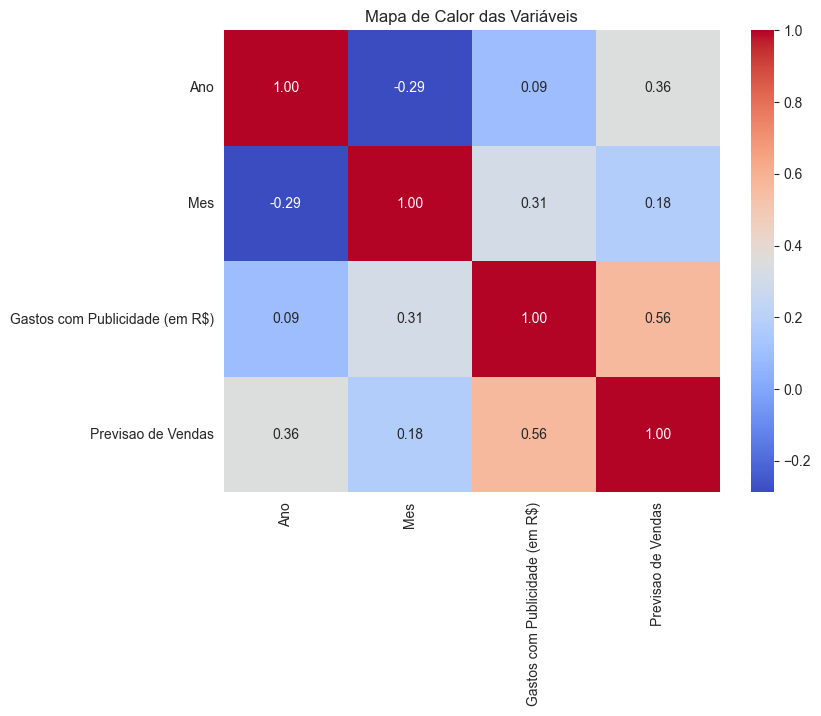

In [16]:
df.rename(columns={'Previsao Inicial de Aumento de Vendas (em mil unidades)': 'Previsao de Vendas'}, inplace=True)
corr = df.corr(numeric_only=True)

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Configurando o título do gráfico
plt.title('Mapa de Calor das Variáveis')
plt.show()

In [17]:
df = pd.get_dummies(df, columns=['Tipo de Midia'], dtype = int)
df.head()

,Ano,Mes,Gastos com Publicidade (em R$),Previsao de Vendas,Tipo de Midia_Google,Tipo de Midia_Instagram,Tipo de Midia_Jornal,Tipo de Midia_Paginas web,Tipo de Midia_Radio,Tipo de Midia_Redes sociais,Tipo de Midia_Revista,Tipo de Midia_TV
0,2022,1,87000.0,1000,0,0,0,1,0,0,0,0
1,2022,1,120000.0,800,0,0,0,0,0,1,0,0
2,2022,1,250000.0,1500,0,0,0,0,0,0,0,1
3,2022,1,110000.0,730,0,0,1,0,0,0,0,0
4,2022,1,40000.0,360,0,0,0,0,0,0,1,0


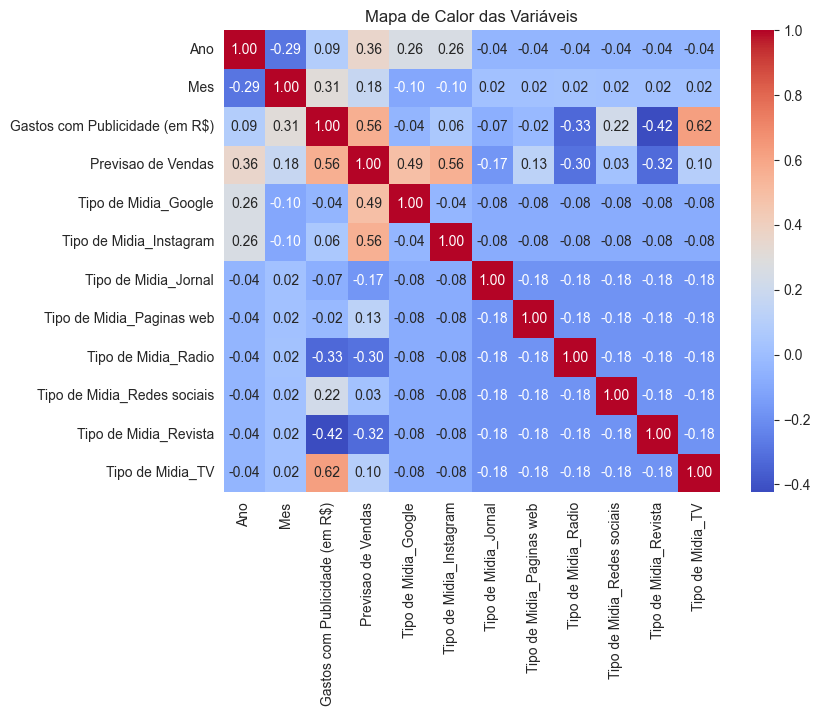

In [18]:
df.rename(columns={'Previsao Inicial de Aumento de Vendas (em mil unidades)': 'Previsao de Vendas'}, inplace=True)
corr = df.corr(numeric_only=True)

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Configurando o título do gráfico
plt.title('Mapa de Calor das Variáveis')
plt.show()

# Modelo de Regressão Linear

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [29]:
X = df.drop(columns = ['Previsao de Vendas'])
y = df['Previsao de Vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 = {r2} \nErro quadratico medio = {mse}")

R2 = 0.9677134084135521 
Erro quadratico medio = 36226.1613129567


In [32]:
mod = sm.OLS(y_train, X_train).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:     Previsao de Vendas   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     400.5
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           5.61e-92
Time:                        23:23:06   Log-Likelihood:                -938.89
No. Observations:                 140   AIC:                             1900.
Df Residuals:                     129   BIC:                             1932.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Ano         

In [56]:
df_predicoes = pd.DataFrame({"Valor_real": y_test, "Valor_predito": y_pred})
df_predicoes['residuo'] = (df_predicoes['Valor_real'] - df_predicoes['Valor_predito'])
df_predicoes.head()

,Valor_real,Valor_predito
15,730,732.003036
171,1568,1504.596412
103,1750,1788.575867
119,233,27.078526
116,1129,531.804729


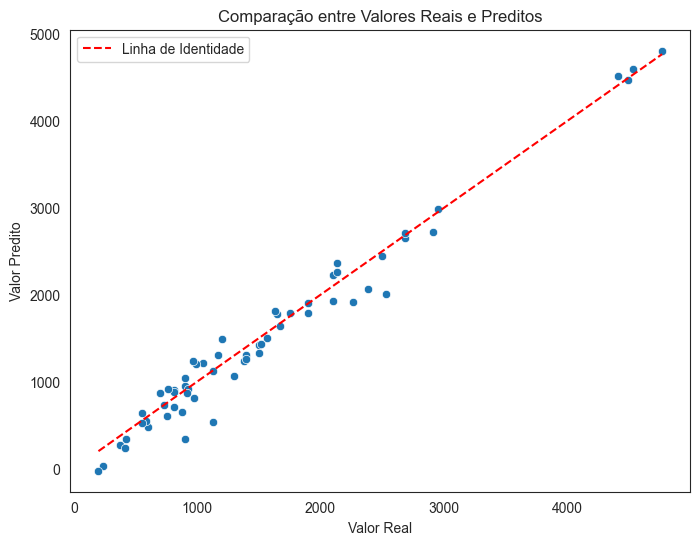

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Valor_real', y='Valor_predito', data=df_predicoes)

plt.plot([df_predicoes['Valor_real'].min(), df_predicoes['Valor_real'].max()],
         [df_predicoes['Valor_real'].min(), df_predicoes['Valor_real'].max()],
         color='red', linestyle='--', label = "Linha de Identidade")

plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()

plt.show()

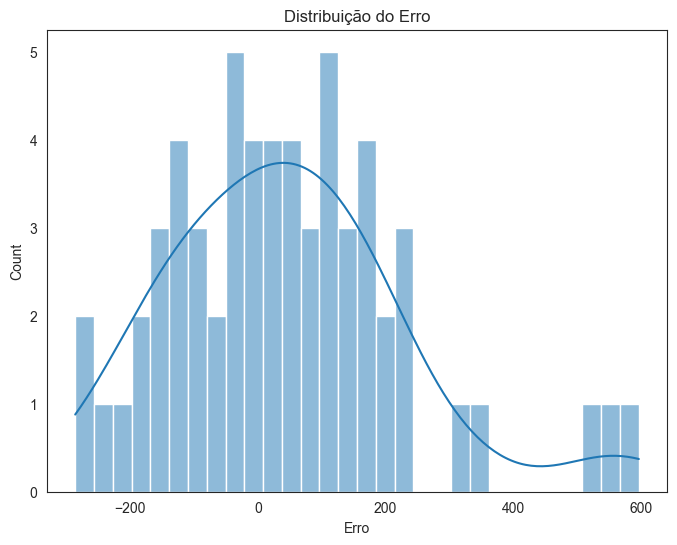

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(df_predicoes['residuo'], bins=30, kde=True)
plt.xlabel('Erro')
plt.title('Distribuição do Erro')
plt.show()

# Analise do melhor tipo de midia

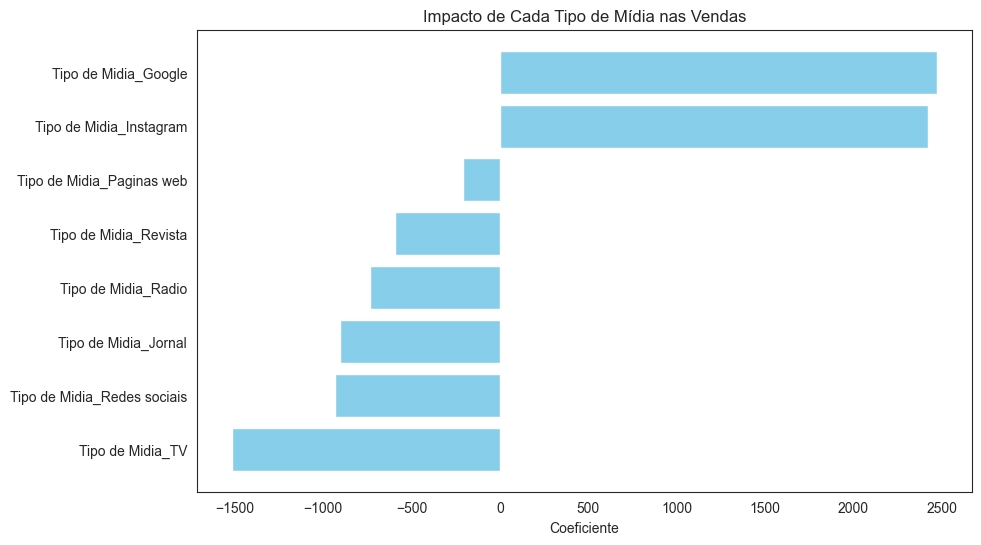

In [76]:
coeficientes = model.coef_
variaveis = X_train.columns


df_coeficientes = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coeficientes
})

df_coeficientes = df_coeficientes.iloc[3:].reset_index(drop=True)


df_coeficientes = df_coeficientes.sort_values(by='Coeficiente')


plt.figure(figsize=(10, 6))
plt.barh(df_coeficientes['Variável'], df_coeficientes['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Impacto de Cada Tipo de Mídia nas Vendas')
plt.show()

# Conclusões

- Fazer um texto bonitinho explicando que o google e o insta tem maior ROI quando comparado aoas demais tipos de midia, sendo a TV o menos significativo. 
- Quando olhamos para o valor investido das midias a tv foi onde foi colocado mais dinheiro enquanto o google e o insta tiveram o menor investimento.
- Grafico de dispersao do valor investido com publicidade vs o Valor previsto de venda mostra que tem uma certa linearidade entre ambos
- Matriz de correlação quanto mais perto de 1 mais forte a correlação
